# Income Prediction

In this Notebook we will try to perform prediction of income, wheter a person will earn more than 50 k.

## Random Forest

In this project we will use random forest Classifier model.

Random Forest is an ensemble learning method that builds a multitude of decision trees and merges them together to get a more accurate and stable prediction. 

For each tree in the forest, a random sample (with replacement) is drawn from the training dataset. This process creates a "bootstrap sample" for training each tree. At each node of a decision tree, only a random subset of features is considered for splitting. The number of features to consider is controlled by the hyperparameter 'max_features'. This introduces randomness and diversity among the trees.


1. **Bootstrapping (Random Sampling with Replacement):**  
    For each tree in the forest, a random sample (with replacement) is drawn from the training dataset. This process creates a "bootstrap sample" for training each tree.  

2. **Random Feature Selection:**  
    At each node of a decision tree, only a random subset of features is considered for splitting. The number of features to consider is controlled by the hyperparameter 'max_features'. This introduces randomness and diversity among the trees.  

3. **Building Decision Trees:**  
    A decision tree is constructed using the bootstrap sample and the selected features at each node. The tree is grown until a predefined stopping criterion is met (e.g., maximum depth reached, minimum samples per leaf).  

4. **Voting (Classification) or Averaging (Regression):**  
    For classification tasks, the class that receives the most votes from the individual trees is chosen as the final prediction. For regression tasks, the average of the predictions from all trees is taken.  

5. **Reducing Overfitting:**  
    The randomness introduced during both bootstrap sampling and feature selection helps in reducing overfitting. Each tree is likely to be overfitted to its own random subset of data, but by combining many trees, the overfitting tendencies are mitigated.  

6. **Out-of-Bag (OOB) Error:**  
    Since each tree is trained on a different subset of data, there are data points (approximately 1/3 of the dataset) that are not used in the training of a particular tree. These out-of-bag samples can be used to estimate the generalization performance of the model without the need for a separate validation set.  
    
7. **Hyperparameter Tuning:**  
    Random Forest has several hyperparameters that can be tuned, such as the number of trees ('n_estimators'), the maximum depth of the trees ('max_depth'), and others. Hyperparameter tuning is often done using techniques like grid search or random search.

## Table of Contents  
1. [Read data](#read-data)
2. [Inspect data](#inspect-data)
3. [Data Cleaning](#Data-Cleaning)
3. [Preprocessing](#preprocessing)
4. [EDA](#eda)
5. [Scaling](#Scaling)
6. [Sampling](#sampling)
7. [Scaling](#scaling)
8. [Feature Selection](#feature-selection)
9. [Split](#split)
10. [Build a model](#build-a-model)
11. [Evaluate](#evaluate)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
relative_path = 'income_evaluation.csv'
path = os.path.join(os.getcwd(),relative_path)

df = pd.read_csv(path)

## 2. [Inspect data](#inspect-data)

In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [5]:
def initial_eda(df):
    if isinstance(df, pd.DataFrame):
        total_na = df.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (df.shape[0], df.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = df.columns
        dtyp = df.dtypes
        uniq = df.nunique()
        na_val = df.isna().sum()
        for i in range(len(df.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(df)))

In [6]:
initial_eda(df)

Dimensions : 32561 rows, 15 columns
Total NA Values : 0 
                           Column Name  Data Type      #Distinct  NA Values
                                   age      int64           73          0
                             workclass     object            9          0
                                fnlwgt      int64        21648          0
                             education     object           16          0
                         education-num      int64           16          0
                        marital-status     object            7          0
                            occupation     object           15          0
                          relationship     object            6          0
                                  race     object            5          0
                                   sex     object            2          0
                          capital-gain      int64          119          0
                          capital-loss      int64    

/var/folders/l_/sd90yz351sn2j7ttw4wtv_7h0000gn/T/ipykernel_2535/3218915043.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))


## Data Cleaning

In [7]:
df.rename(columns=lambda x: x.strip(), inplace=True)
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
assert pd.notnull(df).all().all()

We didn't get an error so we can take it that therereally are no missing values

In [9]:
df_missing = df[df['workclass'].str.strip() == '?']
df_missing.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K


WE see that after all there are missing values. They are recorded as "?". However these are a significant portion, containing many other useful information and most of the missing values regards only occupation and workclass (The only other missing values are native country): so we wont drop them 

Because we will be using encoding later, for now we dont need to do anything to those records i.e. changing them to "other" valeus.

## 3. [Preprocessing](#preprocessing)

In [10]:
num_columns = [column for column in df.columns if df[column].dtype in ['int64', 'float64']]
cat_columns = [column for column in df.columns if df[column].dtype in ['object']]

print(num_columns)
print(cat_columns)

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


In [11]:
for i in cat_columns:
    value_counts = df[i].value_counts()
    total_count = len(df)
    
    # Create a DataFrame with three columns: 'Value', 'Count', 'Percentage'
    result_df = pd.DataFrame({
        'Count': value_counts.values,
        'Percentage': value_counts / total_count
    })
    
    print(f"Column: {i}")
    print(result_df)
    print('\n')

Column: workclass
                   Count  Percentage
workclass                           
 Private           22696    0.697030
 Self-emp-not-inc   2541    0.078038
 Local-gov          2093    0.064279
 ?                  1836    0.056386
 State-gov          1298    0.039864
 Self-emp-inc       1116    0.034274
 Federal-gov         960    0.029483
 Without-pay          14    0.000430
 Never-worked          7    0.000215


Column: education
               Count  Percentage
education                       
 HS-grad       10501    0.322502
 Some-college   7291    0.223918
 Bachelors      5355    0.164461
 Masters        1723    0.052916
 Assoc-voc      1382    0.042443
 11th           1175    0.036086
 Assoc-acdm     1067    0.032769
 10th            933    0.028654
 7th-8th         646    0.019840
 Prof-school     576    0.017690
 9th             514    0.015786
 12th            433    0.013298
 Doctorate       413    0.012684
 5th-6th         333    0.010227
 1st-4th         168    0.0

### Dealing with outliers

In [12]:
for column in num_columns:
    min_threshold, max_threshold = df[column].quantile([0.01, 0.97])
    df = df[(df[column] < max_threshold) & (df[column] >= min_threshold)]

df.reset_index(drop=True, inplace=True)

### Cardinality

Number of labels within a variable is calleg cardinality. When this number is large it may be an issue for ML model.

In [13]:
for i in cat_columns:
    print(i, ' contains ', len(df[i].unique()), ' labels')

workclass  contains  9  labels
education  contains  11  labels
marital-status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native-country  contains  41  labels
income  contains  2  labels


## 4. [EDA](#eda)
### EDA on ctegorical columns

/var/folders/l_/sd90yz351sn2j7ttw4wtv_7h0000gn/T/ipykernel_2535/4165925729.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax[1] = sns.countplot(x="income", data=df, palette="Set2")


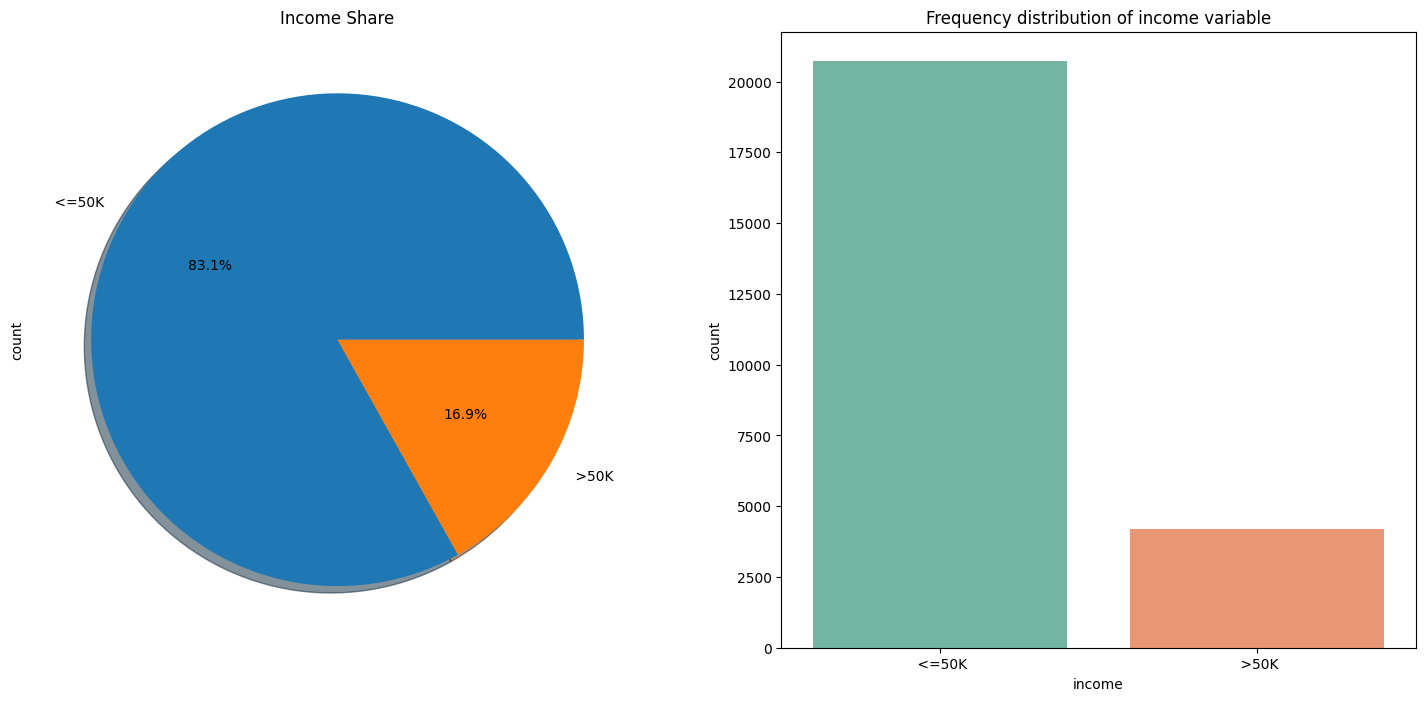

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = df['income'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Income Share')

ax[1] = sns.countplot(x="income", data=df, palette="Set2")
ax[1].set_title("Frequency distribution of income variable")

plt.show()

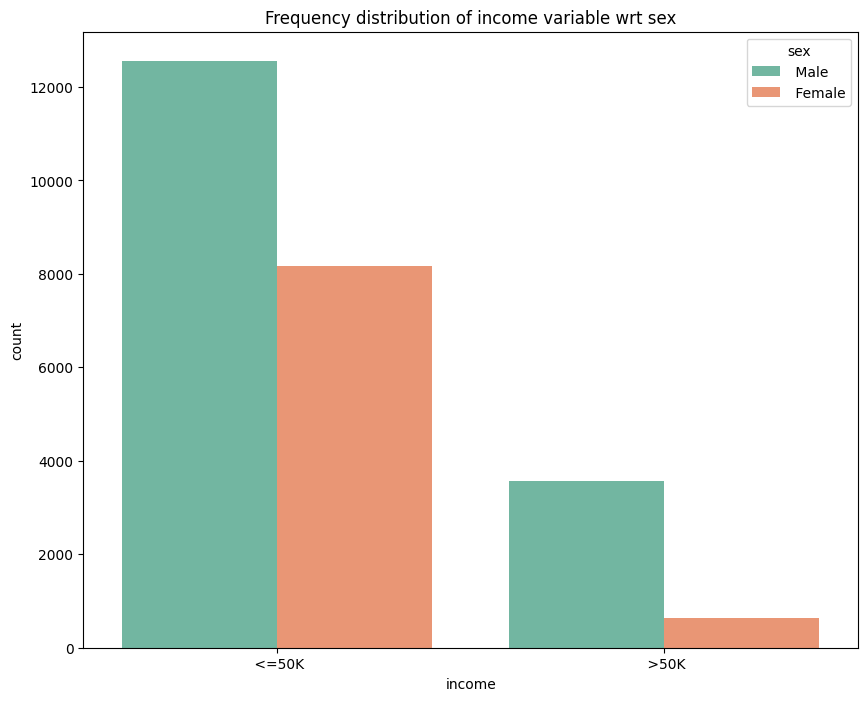

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="sex", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt sex")
plt.show()

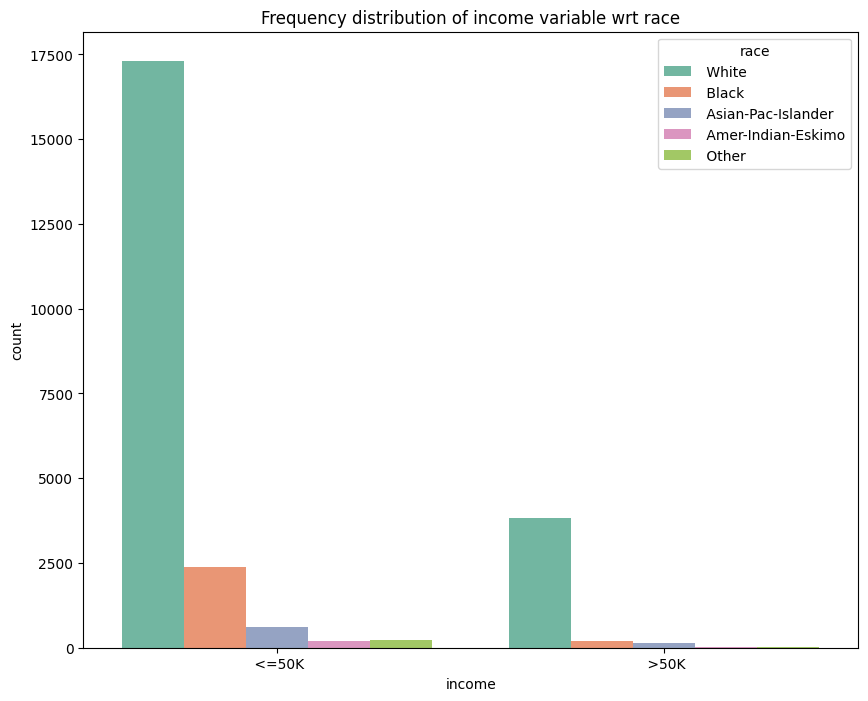

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="income", hue="race", data=df, palette="Set2")
ax.set_title("Frequency distribution of income variable wrt race")
plt.show()

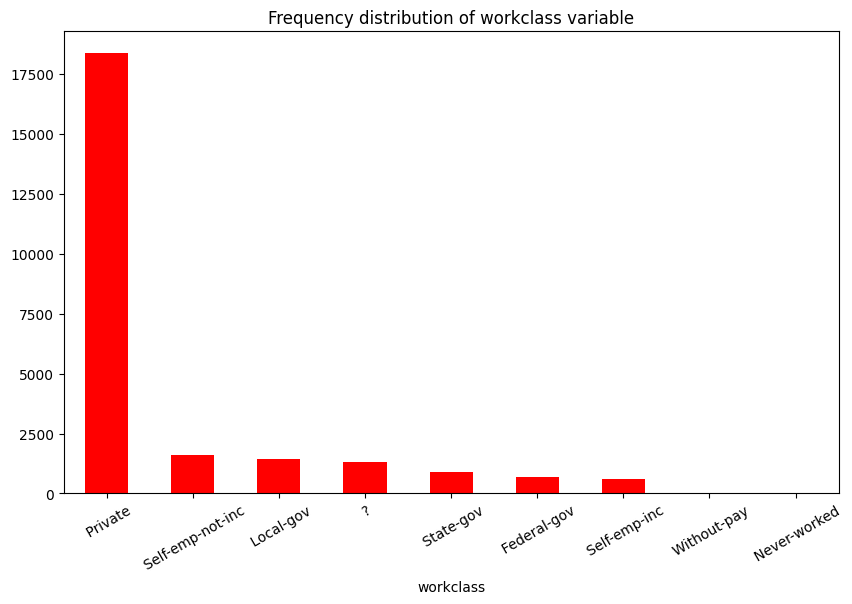

In [17]:
f, ax = plt.subplots(figsize=(10, 6))
ax = df.workclass.value_counts().plot(kind="bar", color="red")
ax.set_title("Frequency distribution of workclass variable")
ax.set_xticklabels(df.workclass.value_counts().index, rotation=30)
plt.show()

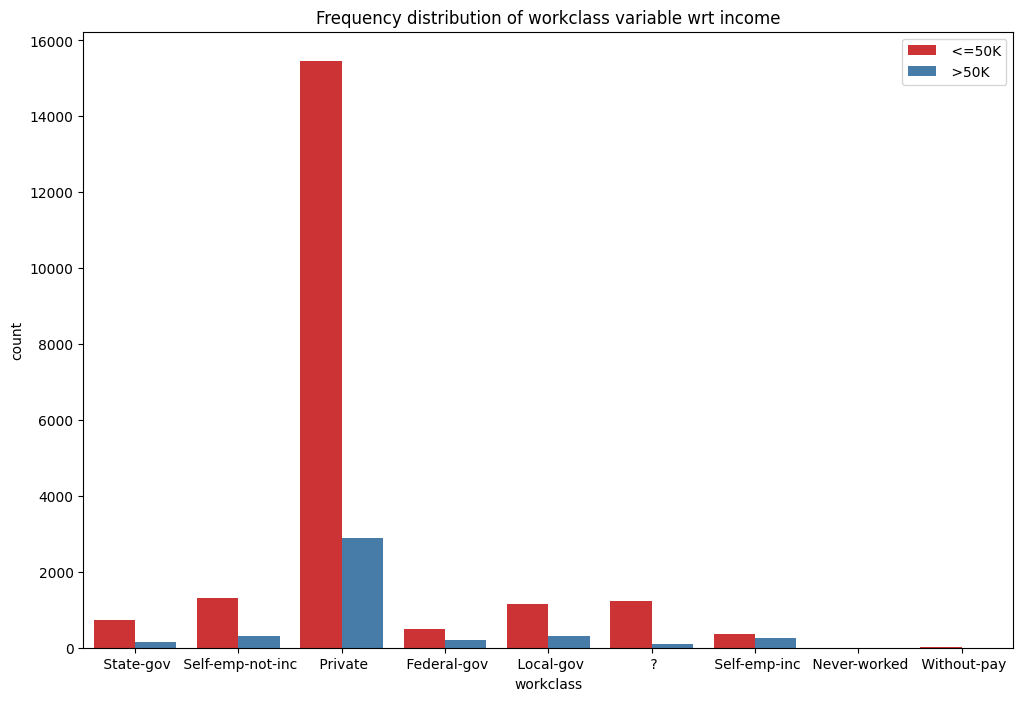

In [18]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="income", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt income")
ax.legend(loc='upper right')
plt.show()

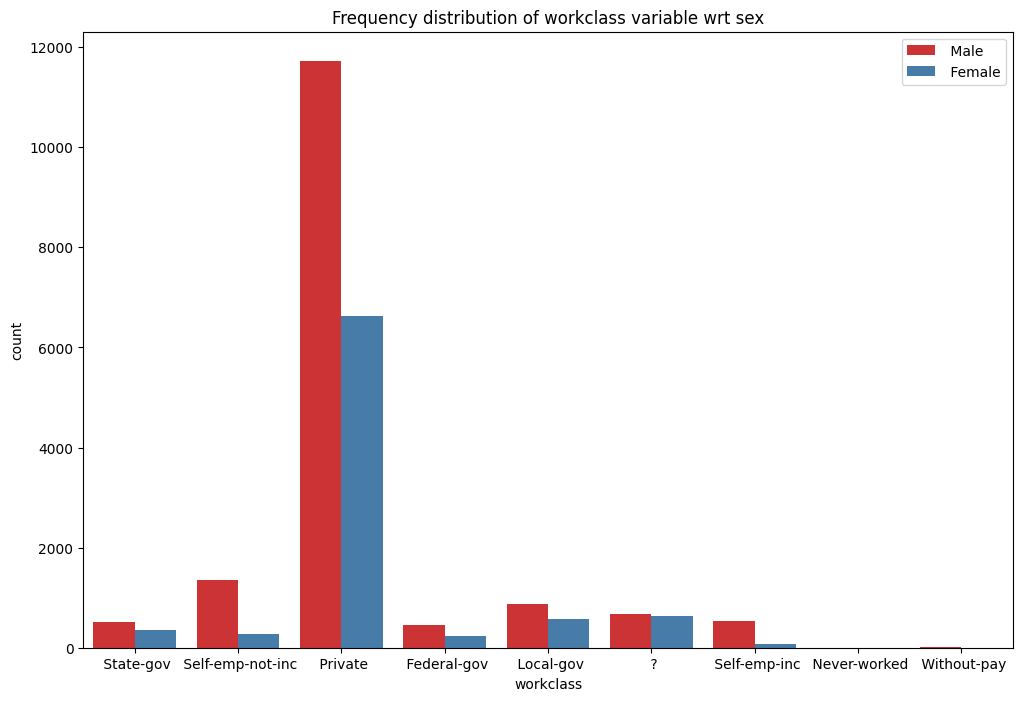

In [19]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="workclass", hue="sex", data=df, palette="Set1")
ax.set_title("Frequency distribution of workclass variable wrt sex")
ax.legend(loc='upper right')
plt.show()

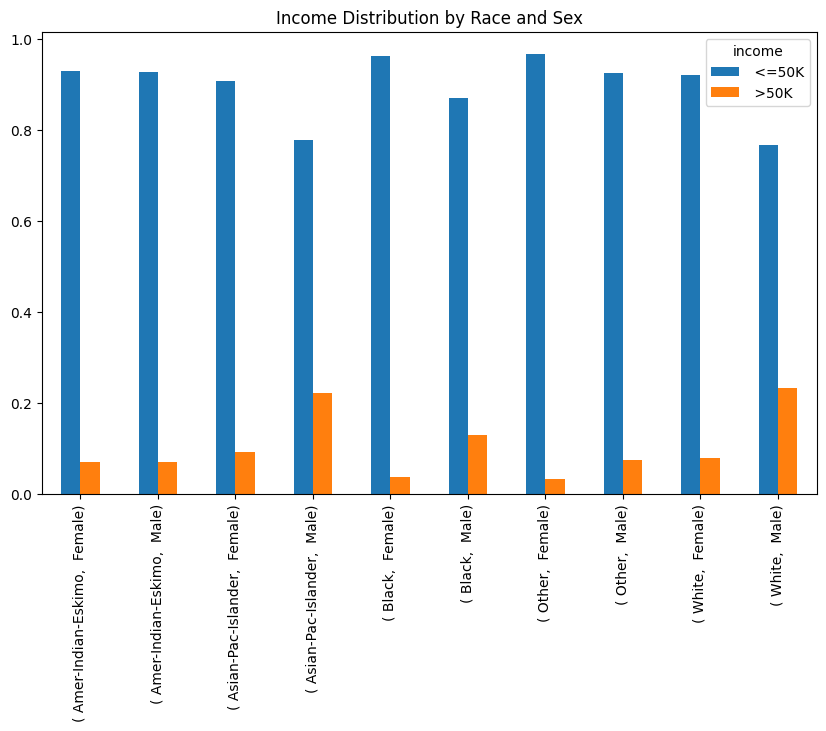

In [20]:
ct = pd.crosstab(index=[df['race'], df['sex']], columns=df['income'], normalize='index')
ct.plot(kind='bar', figsize=(10, 6))# create a grouped bar chart
plt.title('Income Distribution by Race and Sex')
plt.xlabel('')
plt.ylabel('')
plt.show()

<Axes: xlabel='sex', ylabel='age'>

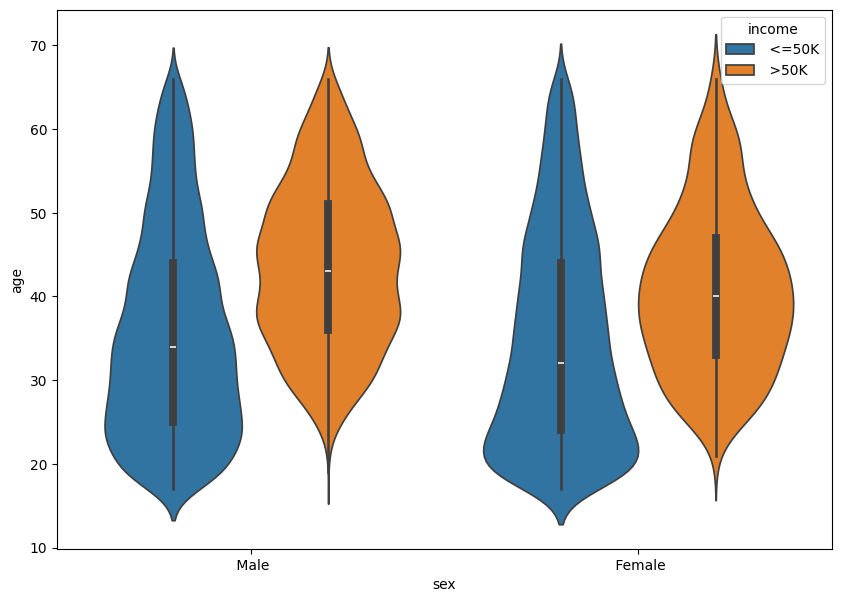

In [21]:
plt.figure(figsize=(10,7))
sns.violinplot(data=df, x='sex', y='age', hue='income')

/var/folders/l_/sd90yz351sn2j7ttw4wtv_7h0000gn/T/ipykernel_2535/3275471684.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="occupation", data=df, palette="Set2")
/var/folders/l_/sd90yz351sn2j7ttw4wtv_7h0000gn/T/ipykernel_2535/3275471684.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)


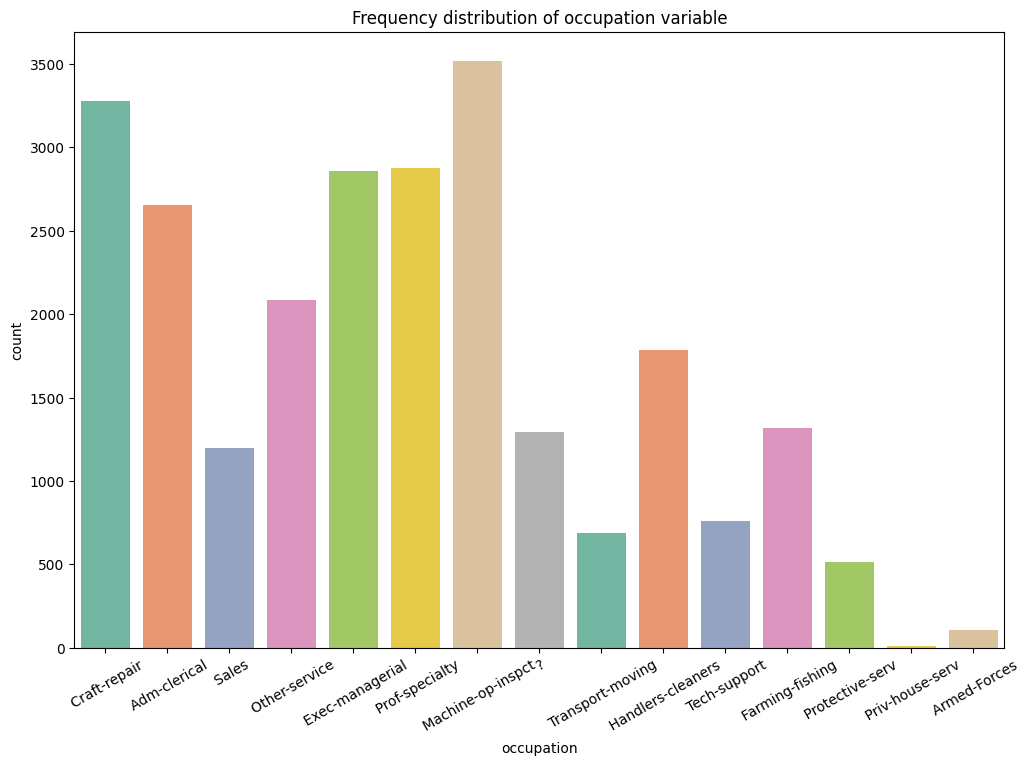

In [22]:
f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="occupation", data=df, palette="Set2")
ax.set_title("Frequency distribution of occupation variable")
ax.set_xticklabels(df.occupation.value_counts().index, rotation=30)
plt.show()

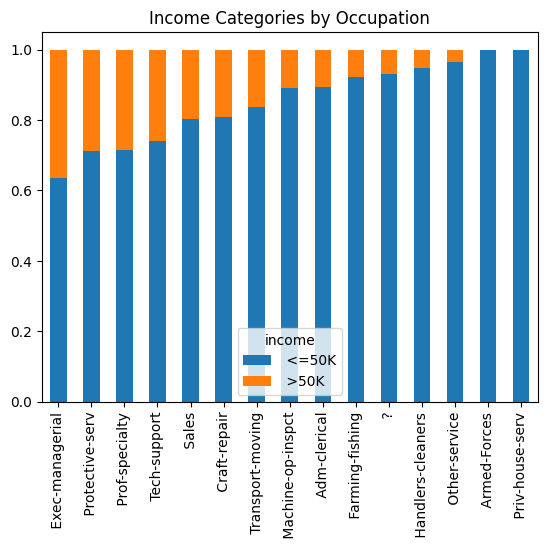

In [23]:
# Create a crosstab of occupation and income categories
df_ct = pd.crosstab(df['occupation'], df['income'])

# Calculate the percentage of each income category for each occupation
df_pct = df_ct.apply(lambda r: r/r.sum(), axis=1)

# Sort the data by the percentage of greater than 50K income category in descending order
df_pct = df_pct.sort_values(by=' >50K', ascending=False)

# Create a stacked bar chart of income categories by occupation
df_pct.plot(kind='bar', stacked=True)

plt.xlabel('')
plt.ylabel('')
plt.title('Income Categories by Occupation')
plt.xticks(rotation=90)
plt.show()

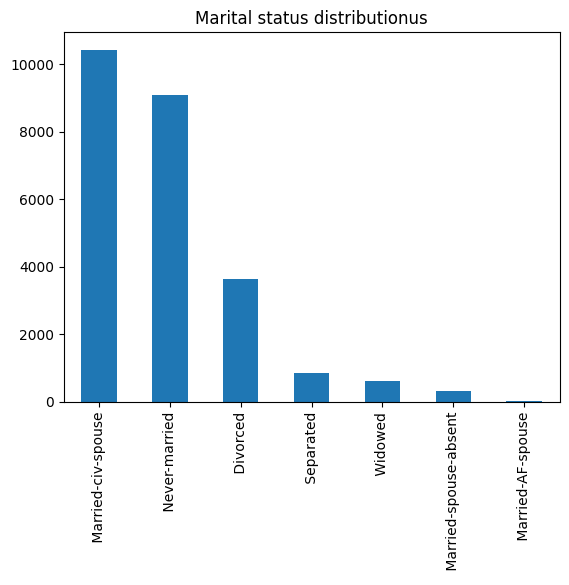

In [24]:
df['marital-status'].value_counts().plot(kind='bar')
plt.xlabel('')
plt.ylabel('')
plt.title('Marital status distributionus')
plt.show()

### EDA on numerical columns

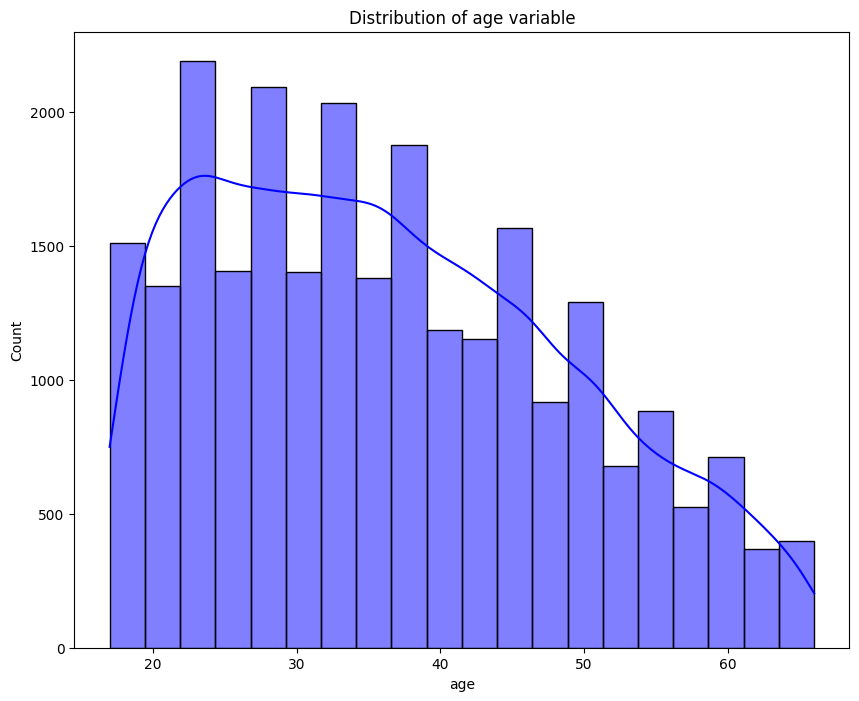

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
x = df['age']
ax = sns.histplot(x, bins=20, color='blue', kde=True) 
ax.set_title("Distribution of age variable")
plt.show()

In [26]:
correlation_matrix = df[num_columns].corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)
correlation_matrix

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.0,-0.06068,-0.01713,0.05887,-0.007628,0.194
fnlwgt,-0.06068,1.0,-0.03561,-0.005496,-0.001812,-0.01911
education-num,-0.01713,-0.03561,1.0,0.01794,0.002724,0.1179
capital-gain,0.05887,-0.005496,0.01794,1.0,-0.02263,0.04278
capital-loss,-0.007628,-0.001812,0.002724,-0.02263,1.0,-0.003028
hours-per-week,0.194,-0.01911,0.1179,0.04278,-0.003028,1.0


In [27]:
#sns.pairplot(df, hue="income")
#plt.show()

## 5. [Scaling](#Scaling)

In [28]:
income_mapping = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].str.strip().map(income_mapping)

In [29]:
cat_columns_adj = [column for column in cat_columns if column != 'income']

label_encoder = LabelEncoder()
for column in cat_columns_adj:
    df[column] = label_encoder.fit_transform(df[column])

In [30]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,8,13,4,1,1,4,1,2174,0,40,38,0
1,50,6,83311,8,13,2,4,0,4,1,0,0,13,38,0
2,38,4,215646,9,9,0,6,1,4,1,0,0,40,38,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,38,0
4,28,4,338409,8,13,2,10,5,2,0,0,0,40,5,0


## [Feature Selection](#feature-selection)

In [31]:
X = df.drop('income', axis=1)
y = df['income']

In [32]:
X_train, y_train = X, y

best_score = float('-inf')
best_k = None
best_feature_indices = None

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Specify a range of k values to test
k_values = [4, 8, 12]

# Perform cross-validation for each k value
for k in k_values:
    k_best_features = SelectKBest(f_classif, k=k)
    X_train_k_best = k_best_features.fit_transform(X_train, y_train)
    
    # Use the transformed data with k features for cross-validation
    scores = cross_val_score(rf_classifier, X_train_k_best, y_train, cv=5)  # Adjust the number of folds as needed

    # Calculate the average score for each k value
    avg_score = np.mean(scores)
    
    # Print the average score for each k value
    print(f'k={k}: Average Cross-Validation Score = {np.mean(scores)}')

    if avg_score > best_score:
        best_k = k
        best_score = avg_score
        best_feature_indices = k_best_features.get_support(indices=True)

# Print the best k and corresponding best score
print(f'Best k: {best_k}, Best Average Cross-Validation Score: {best_score}')
print(f'Selected Feature Indices for Best k: {best_feature_indices}')

k=4: Average Cross-Validation Score = 0.8349444295239825
k=8: Average Cross-Validation Score = 0.8340621838199294
k=12: Average Cross-Validation Score = 0.8471379537861417
Best k: 12, Best Average Cross-Validation Score: 0.8471379537861417
Selected Feature Indices for Best k: [ 0  1  3  4  5  6  7  8  9 10 12 13]


In [33]:
names_of_best_features = df.columns[best_feature_indices]

print(f'Best k: {best_k} with the score: {best_score}')
print(f'Best features: {names_of_best_features}')

Best k: 12 with the score: 0.8471379537861417
Best features: Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'hours-per-week', 'native-country'],
      dtype='object')


### Correlation

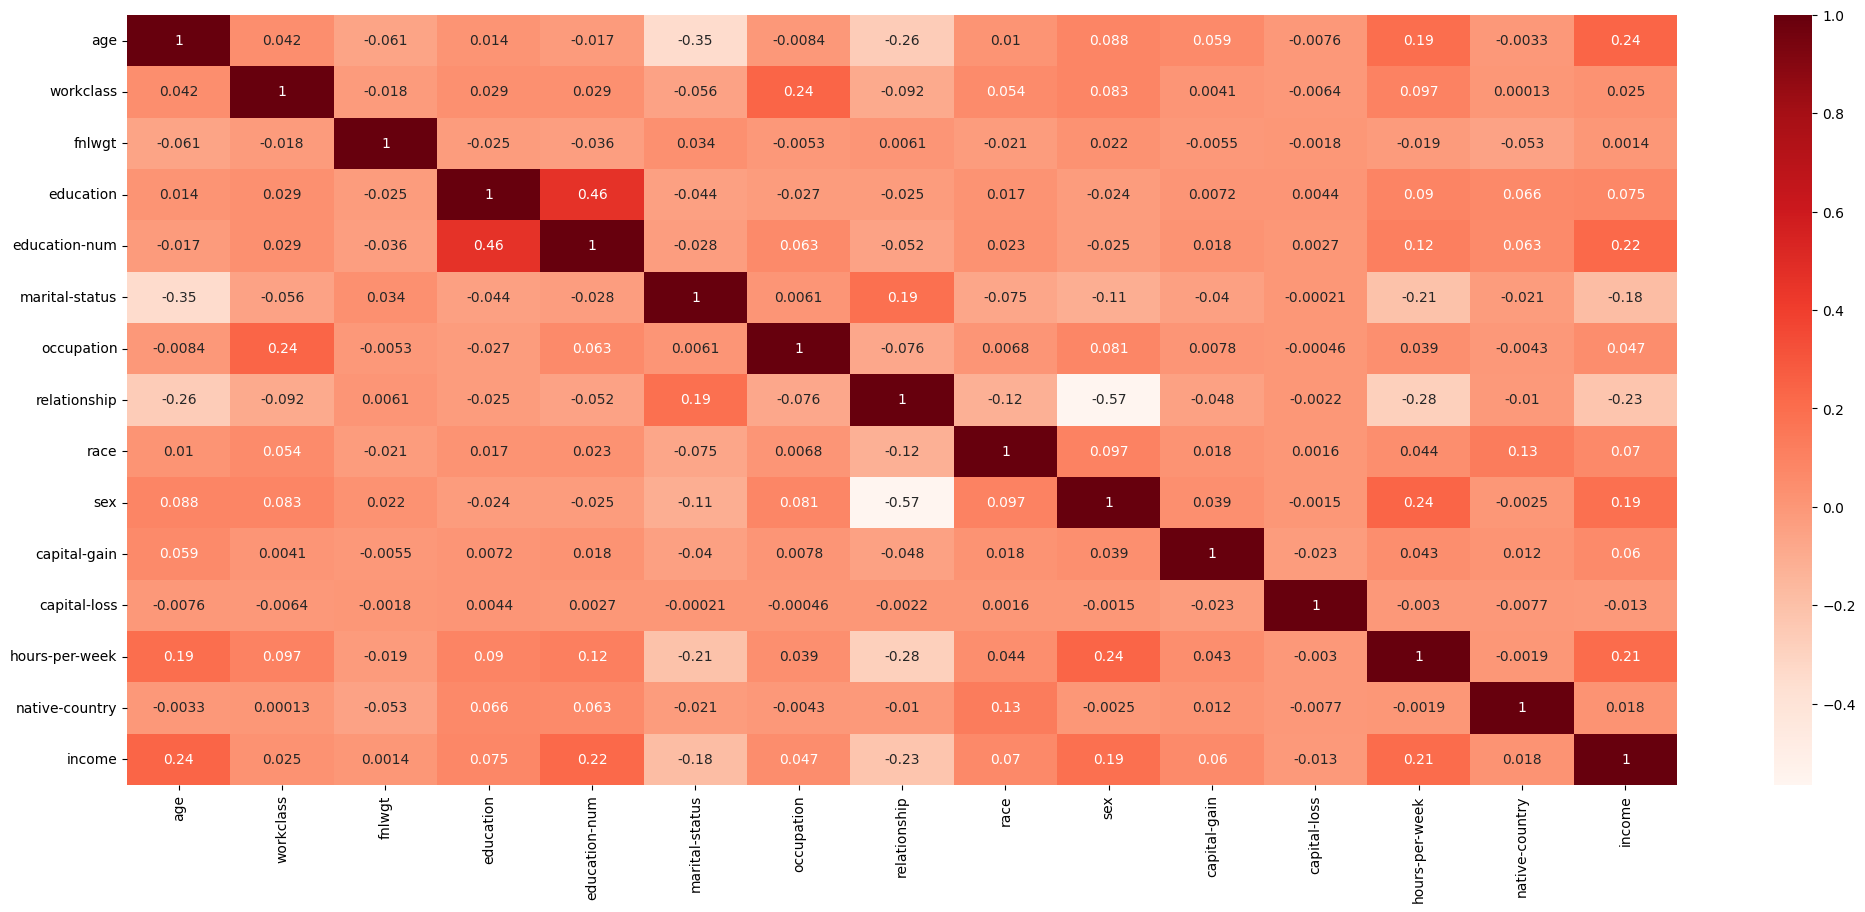

In [34]:
plt.figure(figsize=(25,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [35]:
cor_target = abs(cor["income"])

relevant_features = cor_target
relevant_features.sort_values(ascending=False)

income            1.000000
age               0.238845
relationship      0.226126
education-num     0.218091
hours-per-week    0.208671
sex               0.190385
marital-status    0.182970
education         0.074743
race              0.070214
capital-gain      0.060050
occupation        0.047384
workclass         0.024933
native-country    0.018331
capital-loss      0.012537
fnlwgt            0.001397
Name: income, dtype: float64

## building model


In [39]:
y = df['income']
X = df[names_of_best_features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf = RandomForestClassifier()

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 30, 50],
    'max_depth': [None, 5, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [4, 13]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 20, 'max_features': 4, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


In [40]:
# Extract the best hyperparameters
best_max_depth = best_params['max_depth']
best_max_features = best_params['max_features']
best_min_samples_leaf = best_params['min_samples_leaf']
best_min_samples_split = best_params['min_samples_split']
best_n_estimators = best_params['n_estimators']

# Create a Random Forest Classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(
    max_depth=best_max_depth,
    max_features=best_max_features,
    min_samples_leaf=best_min_samples_leaf,
    min_samples_split=best_min_samples_split,
    n_estimators=best_n_estimators,
    random_state=42  # Set random state for reproducibility
)

# Fit the model on the training data
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_rf_classifier.predict(X_test)

## Evaluate

In [41]:
# Evaluate the performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      5151
           1       0.64      0.40      0.49      1082

    accuracy                           0.86      6233
   macro avg       0.76      0.68      0.70      6233
weighted avg       0.84      0.86      0.84      6233


Confusion Matrix:
[[4905  246]
 [ 648  434]]

Accuracy: 0.8566
